第一次打卡内容包含
1. Pytorch的安装
2. Pytorch的基础知识

由于之前已经装过Pytorch环境了，在这次打卡中主要只包含Pytorch的基础知识，而这也是我在之前的使用过程中忽略的

# 张量

在机器学习中我们可以把张量视为基于向量和矩阵的推广，如下图：

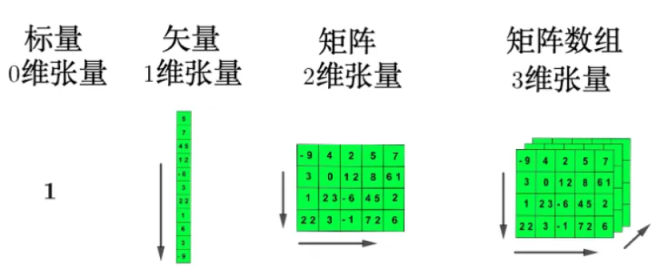

在Pytorch中，`torch.Tensor`是存储和变换数据的主要工具，而且`Tensor`也提供GPU计算、自动求梯度等等，使其非常适合于深度学习



## 1. 创建tensor

In [1]:
import torch

In [2]:
# 随机初始化
x = torch.rand(5, 3)
print(x)

tensor([[0.2150, 0.8190, 0.3113],
        [0.9571, 0.2233, 0.8127],
        [0.2001, 0.6338, 0.0471],
        [0.8125, 0.0767, 0.3838],
        [0.8277, 0.1106, 0.3883]])


In [3]:
# 全0矩阵构建
y = torch.zeros(5, 3, dtype=torch.long)
print(y)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [4]:
y = torch.zero_(x)
print(y)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [5]:
y = torch.zeros_like(x)
print(y)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [6]:
# 直接用数据构建
z = torch.tensor([2.3, 7.6])
print(z)

tensor([2.3000, 7.6000])


In [8]:
# 基于一个已经存在的tensor，创建新的tensor
t = torch.rand(4, 3)
print(t)
new_t = t.new_ones(4, 3, dtype=torch.double)
print(new_t)

tensor([[0.4555, 0.7859, 0.5866],
        [0.0356, 0.6226, 0.0906],
        [0.1696, 0.4802, 0.0019],
        [0.1899, 0.8161, 0.7166]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


## 2. 张量的操作

In [9]:
# 加法操作
x = torch.rand(4, 3)
y = torch.rand(4, 3)
print(y+x)

print(torch.add(x, y))

y.add_(x)  # 原值修改
print(y)

tensor([[0.5069, 0.5556, 1.0844],
        [0.8109, 0.5790, 0.5199],
        [1.1919, 0.6007, 1.5947],
        [1.4085, 1.3739, 0.1693]])
tensor([[0.5069, 0.5556, 1.0844],
        [0.8109, 0.5790, 0.5199],
        [1.1919, 0.6007, 1.5947],
        [1.4085, 1.3739, 0.1693]])
tensor([[0.5069, 0.5556, 1.0844],
        [0.8109, 0.5790, 0.5199],
        [1.1919, 0.6007, 1.5947],
        [1.4085, 1.3739, 0.1693]])


In [10]:
# 索引操作（索引出来的与原数据共享内存）
x = torch.rand(4, 3)
print(x)
print(x[:, 1])

tensor([[0.2187, 0.9848, 0.3923],
        [0.2586, 0.0890, 0.9230],
        [0.7981, 0.4652, 0.8637],
        [0.7358, 0.9958, 0.2299]])
tensor([0.9848, 0.0890, 0.4652, 0.9958])


In [11]:
y = x[0, :]
y += 1
print(y)
print(x[0, :])

tensor([1.2187, 1.9848, 1.3923])
tensor([1.2187, 1.9848, 1.3923])


In [13]:
# 维度变换
# torch.view()返回的新tensor与原tensor共享内存，仅仅改变观察角度
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())
print(x)
print(y)
print(z)

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])
tensor([[ 1.4093,  0.0775, -0.9085,  0.7279],
        [ 1.2531,  0.2224,  0.2591,  0.7999],
        [ 0.4751,  0.5030, -1.2228,  1.9691],
        [-1.7264,  1.5776, -0.5928, -0.6446]])
tensor([ 1.4093,  0.0775, -0.9085,  0.7279,  1.2531,  0.2224,  0.2591,  0.7999,
         0.4751,  0.5030, -1.2228,  1.9691, -1.7264,  1.5776, -0.5928, -0.6446])
tensor([[ 1.4093,  0.0775, -0.9085,  0.7279,  1.2531,  0.2224,  0.2591,  0.7999],
        [ 0.4751,  0.5030, -1.2228,  1.9691, -1.7264,  1.5776, -0.5928, -0.6446]])


In [14]:
x += 1
print(x)
print(y)

tensor([[ 2.4093,  1.0775,  0.0915,  1.7279],
        [ 2.2531,  1.2224,  1.2591,  1.7999],
        [ 1.4751,  1.5030, -0.2228,  2.9691],
        [-0.7264,  2.5776,  0.4072,  0.3554]])
tensor([ 2.4093,  1.0775,  0.0915,  1.7279,  2.2531,  1.2224,  1.2591,  1.7999,
         1.4751,  1.5030, -0.2228,  2.9691, -0.7264,  2.5776,  0.4072,  0.3554])


In [15]:
# 取值操作
x = torch.randn(1)
print(type(x))
print(type(x.item()))

<class 'torch.Tensor'>
<class 'float'>


## 3. 广播机制

In [16]:
# 当对两个形状不同的tensor进行操作时
# 可能触发广播机制，适当复制元素使得这两个tensor形状相同后再运算
x = torch.arange(1, 3).view(1, 2)
print(x)
y = torch.arange(1, 4).view(3, 1)
print(y)
print(x+y)

tensor([[1, 2]])
tensor([[1],
        [2],
        [3]])
tensor([[2, 3],
        [3, 4],
        [4, 5]])


# 自动求导

如果设置tensor的属性`.requires_grad`为True，那么pytorch会追踪该张量的全部操作

在完成计算后，可以调用`.backward()`自动计算所有的梯度，这个梯度会自动累加到`.grad`属性上

如果需要阻止一个张量被跟踪，可以调用`.detach()`方法，或者将代码块包装在`with torch.no_grad():`里面

## 1. Autograd

In [17]:
# 举个例子
x = torch.tensor([2.], requires_grad=True)
print(x.grad)

None


In [18]:
y = x * x * 3
y.backward()
print(x.grad)

tensor([12.])


In [19]:
z = x * x * 3
z.backward()
print(x.grad)

tensor([24.])


Function与Tensor互相连接生成了一个无环图，编码了完整的计算历史

每一个张量都有一个`.grad_fn`属性，引用了创建该tensor的function（除非是手动创建的）

In [20]:
from __future__ import print_function
x = torch.randn(3, 3, requires_grad=True)
print(x.grad_fn)

None


## 2. 梯度

In [21]:
x = torch.ones(1, requires_grad=True)

print(x.data)  # tensor
print(x.data.requires_grad)  # 已独立于计算图之外

y = 2 * x
x.data *= 100  # 只改变值，未被记录在计算图中，不影响梯度传播

y.backward()
print(x)  # 改变data也会改变tensor值
print(x.grad)

tensor([1.])
False
tensor([100.], requires_grad=True)
tensor([2.])


# 并行计算

1. 在使用GPU时，使用的是`.cuda()`而不是`.gpu()`
2. 数据在CPU与GPU之间传输比较耗时，应尽量避免数据切换
3. 当服务器有多块GPU时，应指明具体使用哪一块
4. 目前使用最多的并行方法是数据并行

In [22]:
# 可以通过以下的方法设置显卡
import os
os.environ["CUDA_VISIBLE_DEVICE"] = "0" # 设置默认的显卡